In [282]:
import pandas as pd
import seaborn as sb
import numpy as np
import xgboost as xgb
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import StackingRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from xgboost import XGBRegressor

In [283]:
# Путь к загруженному файлу
file_path = 'data/prices_train.csv'

In [284]:
# Чтение данных
data = pd.read_csv(file_path)

# Просмотр первых строк для анализа структуры данных
data.head()

,Unnamed: 0,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0,2013.083,34.0,157.6052,7.0,24.96628,121.54196,39.1
1,1,2013.500,13.3,561.9845,5.0,24.98746,121.54391,54.8
2,2,2012.917,13.7,1236.5640,1.0,24.97694,121.55391,30.6
3,3,2013.500,8.5,104.8101,5.0,24.96674,121.54067,55.5
4,4,2013.500,13.2,1164.8380,NaN,24.99156,121.53406,34.3


In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              331 non-null    int64  
 1   X1 transaction date                     331 non-null    float64
 2   X2 house age                            323 non-null    float64
 3   X3 distance to the nearest MRT station  324 non-null    float64
 4   X4 number of convenience stores         317 non-null    float64
 5   X5 latitude                             331 non-null    float64
 6   X6 longitude                            331 non-null    float64
 7   Y house price of unit area              331 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 20.8 KB


In [286]:
# Убираем лишний столбец с индексами
data_cleaned = data.drop(columns=['Unnamed: 0'])

In [287]:
data_cleaned.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.019600,0.063868,0.020173,0.043607,-0.068576,0.103270
X2 house age,0.019600,1.000000,0.037584,0.004413,0.029107,-0.067620,-0.256460
X3 distance to the nearest MRT station,0.063868,0.037584,1.000000,-0.640579,-0.587350,-0.822280,-0.672736
X4 number of convenience stores,0.020173,0.004413,-0.640579,1.000000,0.433858,0.474725,0.575161
X5 latitude,0.043607,0.029107,-0.587350,0.433858,1.000000,0.426538,0.541982
X6 longitude,-0.068576,-0.067620,-0.822280,0.474725,0.426538,1.000000,0.538171
Y house price of unit area,0.103270,-0.256460,-0.672736,0.575161,0.541982,0.538171,1.000000


<Axes: >

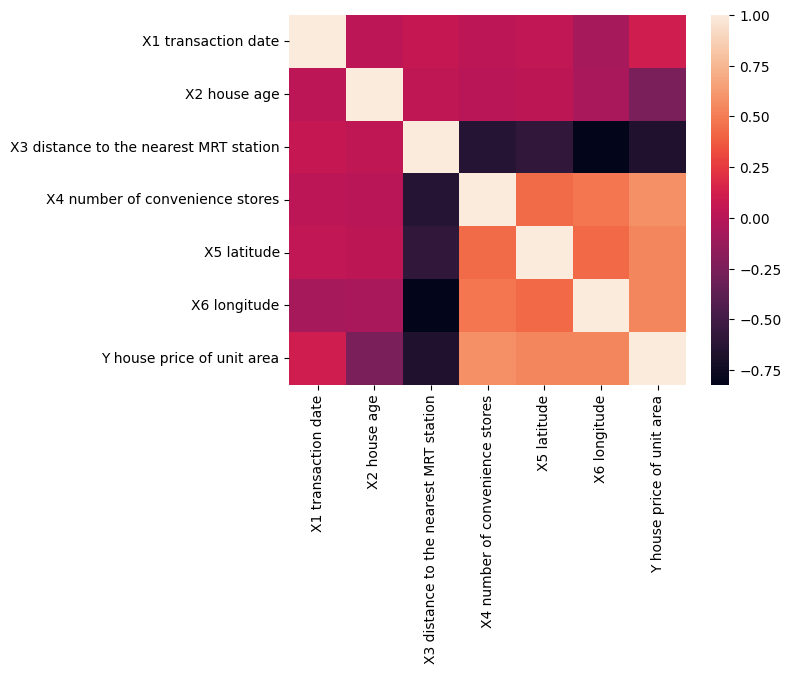

In [288]:
sb.heatmap(data_cleaned.corr())

In [289]:
# Разделяем признаки и целевую переменную
X = data_cleaned.drop(columns=['Y house price of unit area'])
y = data_cleaned['Y house price of unit area']

In [290]:
# Применение KNN для заполнения пропусков в признаках
knn_imputer = KNNImputer(n_neighbors=20)
X_imputed = knn_imputer.fit_transform(X)

In [291]:
# Разделяем на обучающую и тестовую выборки (80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=42)

In [292]:
# Путь к загруженному файлу
file_path = 'data/merged_result.csv'

In [293]:
# Чтение данных
data_test = pd.read_csv(file_path)

# Разделяем признаки и целевую переменную
X = data_test.drop(columns=['Y house price of unit area'])
y = data_test['Y house price of unit area']

# Применение KNN для заполнения пропусков в признаках
knn_imputer = KNNImputer(n_neighbors=20)
X_imputed = knn_imputer.fit_transform(X)



In [294]:
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели на масштабированных данных
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Предсказания на тестовой выборке
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Оценка качества модели
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)

mse_scaled, mae_scaled

(107.07355040652813, 7.663306956786268)

In [295]:
X_scaled = scaler.transform(X_imputed)

# Предсказания на тестовой выборке
y_pred_scaled = model_scaled.predict(X_scaled)

# Оценка качества модели
mse_scaled = mean_squared_error(y, y_pred_scaled)
mae_scaled = mean_absolute_error(y, y_pred_scaled)

mse_scaled, mae_scaled

(83.02390088997315, 6.904951868836558)

In [296]:
# Добавляем Bagging регрессор
bagging_model = BaggingRegressor(estimator=Ridge(alpha=0.5), n_estimators=50, random_state=42)
bagging_model.fit(X_train_scaled, y_train)

# Предсказания на тестовой выборке для Bagging
y_pred_bagging = bagging_model.predict(X_test_scaled)

# Оценка качества модели
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)

print(f"Bagging Regressor MSE: {mse_bagging}, MAE: {mae_bagging}")

Bagging Regressor MSE: 107.29049414250345, MAE: 7.698531952968879


In [297]:

# Предсказания на тестовой выборке для Bagging
y_pred_bagging = bagging_model.predict(X_scaled)

# Оценка качества модели
mse_bagging = mean_squared_error(y, y_pred_bagging)
mae_bagging = mean_absolute_error(y, y_pred_bagging)

print(f"Bagging Regressor MSE: {mse_bagging}, MAE: {mae_bagging}")

Bagging Regressor MSE: 82.50610781300188, MAE: 6.885465002013759


In [298]:
# Добавление полиномиальных признаков (например, степень 5)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Обучаем XGBoost в линейном режиме
boosting_model = xgb.XGBRegressor(booster="gblinear", learning_rate=0.05, n_estimators=100, random_state=42)
boosting_model.fit(X_train_poly, y_train)

# Предсказания
y_pred_boosting = boosting_model.predict(X_test_poly)

# Оценка качества
mse_boosting = mean_squared_error(y_test, y_pred_boosting)
mae_boosting = mean_absolute_error(y_test, y_pred_boosting)

print(f"XGBoost (Linear) MSE: {mse_boosting:.4f}, MAE: {mae_boosting:.4f}")

XGBoost (Linear) MSE: 91.3735, MAE: 6.7452


In [299]:
X_poly = poly.transform(X_scaled)

# Предсказания на тестовой выборке для Boosting
y_pred_boosting = boosting_model.predict(X_poly)

# Оценка качества модели
mse_boosting = mean_squared_error(y, y_pred_boosting)
mae_boosting = mean_absolute_error(y, y_pred_boosting)

print(f"Boosting Regressor MSE: {mse_boosting}, MAE: {mae_boosting}")

Boosting Regressor MSE: 69.3900258878763, MAE: 6.438864356351186


In [300]:

# Добавляем Ridge регрессор (L2 регуляризация)
ridge_model = Ridge(alpha=0.5)  # alpha - коэффициент регуляризации
ridge_model.fit(X_train_poly, y_train)

# Предсказания на тестовой выборке для Ridge
y_pred_ridge = ridge_model.predict(X_test_poly)

# Оценка качества модели
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}, MAE: {mae_ridge}")

# Добавляем Lasso регрессор (L1 регуляризация)
lasso_model = Lasso(alpha=0.1)  # alpha - коэффициент регуляризации
lasso_model.fit(X_train_poly, y_train)

# Предсказания на тестовой выборке для Lasso
y_pred_lasso = lasso_model.predict(X_test_poly)

# Оценка качества модели
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}, MAE: {mae_lasso}")

# Добавляем ElasticNet регрессор (комбинированная L1 и L2 регуляризация)
elasticnet_model = ElasticNet(alpha=0.2, l1_ratio=0.78)  # alpha - коэффициент регуляризации, l1_ratio - соотношение L1/L2
elasticnet_model.fit(X_train_poly, y_train)

# Предсказания на тестовой выборке для ElasticNet
y_pred_elasticnet = elasticnet_model.predict(X_test_poly)

# Оценка качества модели
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)

print(f"ElasticNet Regression MSE: {mse_elasticnet}, MAE: {mae_elasticnet}")

Ridge Regression MSE: 169.60509642022907, MAE: 7.922676456180136
Lasso Regression MSE: 76.4376127698004, MAE: 5.668014001134892
ElasticNet Regression MSE: 80.10641649074452, MAE: 6.005748173204376


c:\Users\Kostya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.651e+02, tolerance: 5.536e+00
  model = cd_fast.enet_coordinate_descent(


In [301]:
# Предсказания на тестовой выборке для ElasticNet
y_pred_elasticnet = elasticnet_model.predict(X_poly)

# Оценка качества модели
mse_elasticnet = mean_squared_error(y, y_pred_elasticnet)
mae_elasticnet = mean_absolute_error(y, y_pred_elasticnet)

print(f"ElasticNet Regression MSE: {mse_elasticnet}, MAE: {mae_elasticnet}")

ElasticNet Regression MSE: 62.30562725079544, MAE: 5.84965901182918


In [302]:
# Обучение модели линейной регрессии с полиномиальными признаками
model_poly = ElasticNet(alpha=0.19, l1_ratio=0.78)
model_poly.fit(X_train_poly, y_train)

# Предсказания на тестовой выборке
y_pred_poly = model_poly.predict(X_test_poly)

# Оценка качества модели с полиномиальными признаками
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"Linear Regression with Polynomial Features MSE: {mse_poly}, MAE: {mae_poly}")

Linear Regression with Polynomial Features MSE: 79.70888092174718, MAE: 5.965942420599397


In [303]:


# Предсказания на тестовой выборке
y_pred_poly = model_poly.predict(X_poly)

# Оценка качества модели с полиномиальными признаками
mse_poly = mean_squared_error(y, y_pred_poly)
mae_poly = mean_absolute_error(y, y_pred_poly)

print(f"Linear Regression with Polynomial Features MSE: {mse_poly}, MAE: {mae_poly}")

Linear Regression with Polynomial Features MSE: 62.28326043307427, MAE: 5.834928828898007


In [304]:
# Добавление полиномиальных признаков (например, степень 2)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Обучение модели Gradient Boosting с полиномиальными признаками
boosting_model_poly = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)
boosting_model_poly.fit(X_train_poly, y_train)

# Предсказания на тестовой выборке для Boosting с полиномиальными признаками
y_pred_boosting_poly = boosting_model_poly.predict(X_test_poly)

# Оценка качества модели Boosting с полиномиальными признаками
mse_boosting_poly = mean_squared_error(y_test, y_pred_boosting_poly)
mae_boosting_poly = mean_absolute_error(y_test, y_pred_boosting_poly)

print(f"Boosting with Polynomial Features MSE: {mse_boosting_poly}, MAE: {mae_boosting_poly}")

Boosting with Polynomial Features MSE: 162.69269736617906, MAE: 6.829483489259182


In [305]:
X_poly = poly.transform(X_scaled)

# Предсказания на тестовой выборке для Boosting с полиномиальными признаками
y_pred_boosting_poly = boosting_model_poly.predict(X_poly)

# Оценка качества модели Boosting с полиномиальными признаками
mse_boosting_poly = mean_squared_error(y, y_pred_boosting_poly)
mae_boosting_poly = mean_absolute_error(y, y_pred_boosting_poly)

print(f"Boosting with Polynomial Features MSE: {mse_boosting_poly}, MAE: {mae_boosting_poly}")

Boosting with Polynomial Features MSE: 62.078907545973415, MAE: 5.354096568687714


In [306]:
# Создание полиномиальных признаков (например, степень 2)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


selector = SelectKBest(score_func=f_regression, k=38)
X_train_poly = selector.fit_transform(X_train_poly, y_train)
X_test_poly = selector.transform(X_test_poly)

# Определяем базовые модели для стекинга
xgb_model = XGBRegressor(n_estimators=300, max_depth=7, learning_rate=0.1, random_state=42)

# Определяем стекинг-регрессор
stacking_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model)
    ],
    final_estimator=LinearRegression()
)

# Обучаем стекинг-модель
stacking_model.fit(X_train_poly, y_train)

# Предсказания на тестовой выборке
y_pred_stacking = stacking_model.predict(X_test_poly)

# Оценка качества модели
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)

print(f"Stacking (XGBoost + Standart) with Polynomial Features MSE: {mse_stacking:.4f}, MAE: {mae_stacking:.4f}")

Stacking (XGBoost + Standart) with Polynomial Features MSE: 108.2983, MAE: 7.1596


In [307]:
X_poly = poly.transform(X_scaled)
X_poly = selector.transform(X_poly)
# Предсказания на тестовой выборке
y_pred_stacking = stacking_model.predict(X_poly)

# Оценка качества модели
mse_stacking = mean_squared_error(y, y_pred_stacking)
mae_stacking = mean_absolute_error(y, y_pred_stacking)

print(f"Stacking (XGBoost + Standart) with Polynomial Features MSE: {mse_stacking:.4f}, MAE: {mae_stacking:.4f}")

Stacking (XGBoost + Standart) with Polynomial Features MSE: 51.3519, MAE: 5.2395


In [308]:

# Создаем DataFrame с индексами и округлёнными предсказаниями
predictions_df = pd.DataFrame({
    'index': np.arange(len(y_pred_stacking)),  # Индексы от 0 до N-1
    'Y house price of unit area': y_pred_stacking
})

# Сохраняем в CSV без заголовков индекса
predictions_df.to_csv('predictions.csv', index=False)

print("Файл сохранён!")

Файл сохранён!
